# Week6 Time Series 정규세션 과제

### 주가 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
### Box-Jenkins 방법론
- 식별
- 추정
- 진단
- 예측

## 라이브러리 불러오기

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00


In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMAResults

<ipython-input-19-0d11830a162b>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## 주가 데이터 불러오기
- 예) 삼성 005930.KS

In [6]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


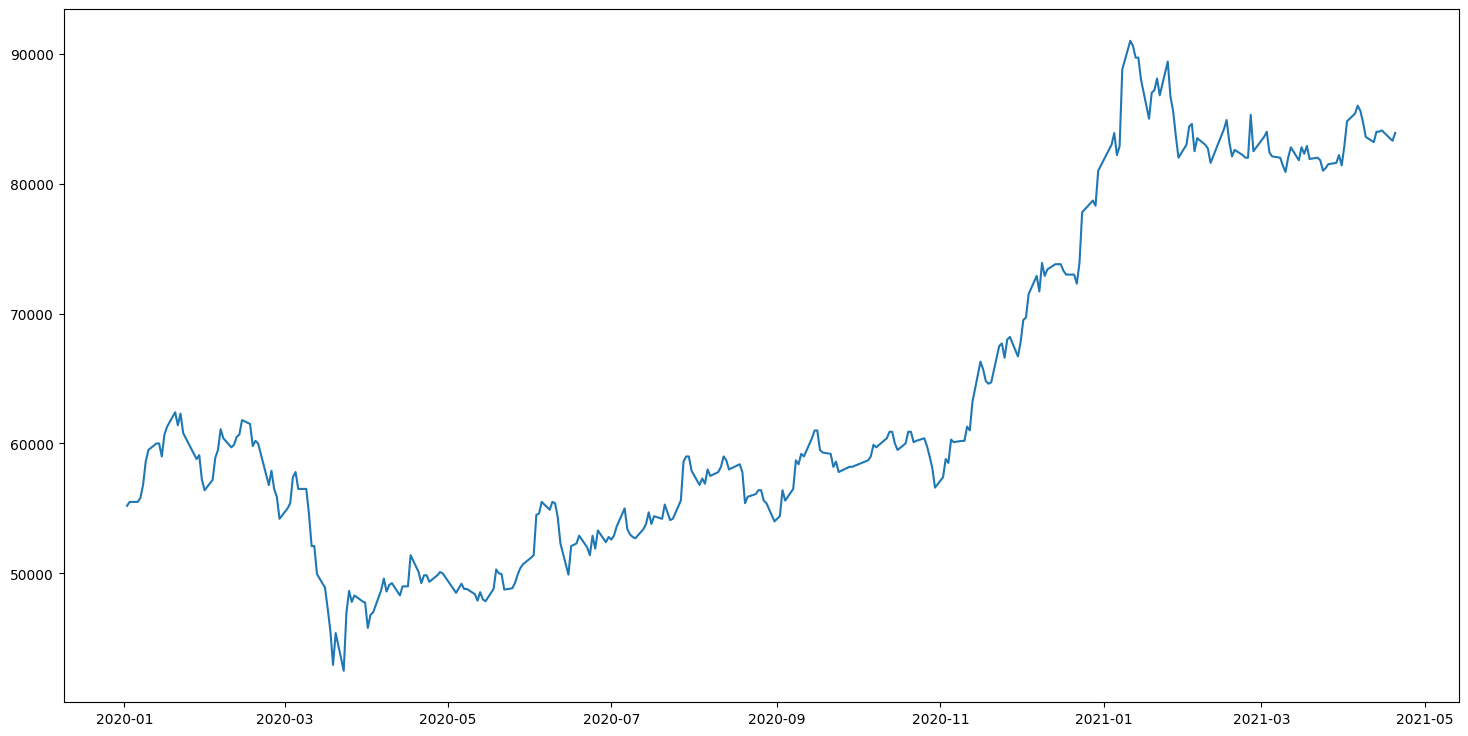

In [7]:
## 정상성 확인
plt.figure(figsize=(18,9))
plt.plot(samsung_df.index, samsung_df["price"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Price')
plt.show()

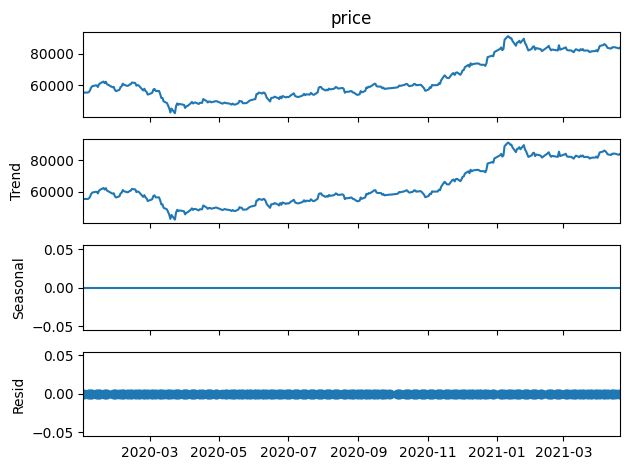

In [8]:
decompose = seasonal_decompose(samsung_df['price'], model='addictive', period=1).plot()

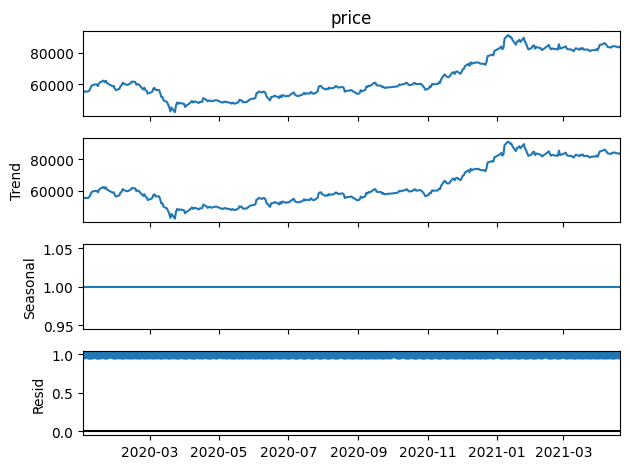

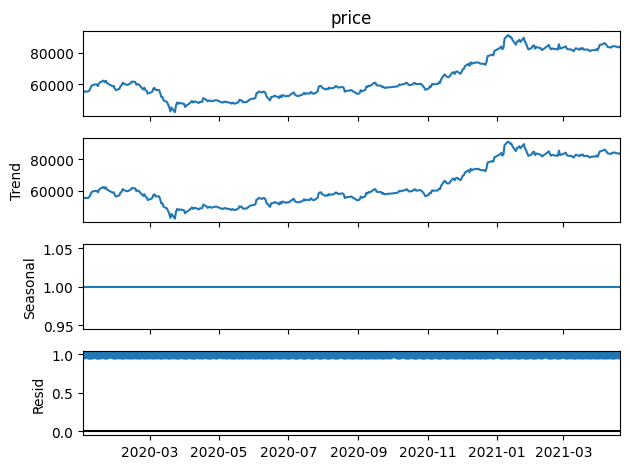

In [9]:
seasonal_decompose(samsung_df['price'], model='multiplicative', period=1).plot()

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(samsung_df, test_size=0.2, shuffle=False)

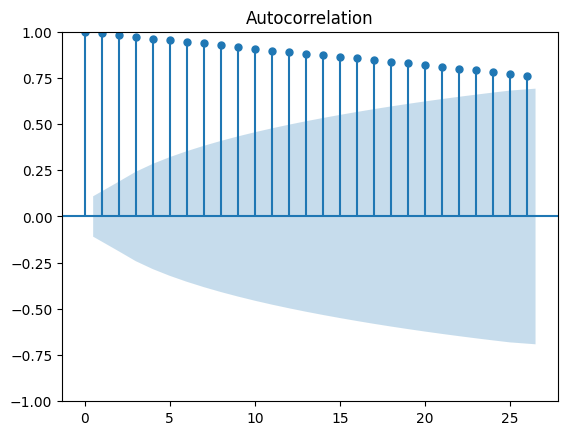

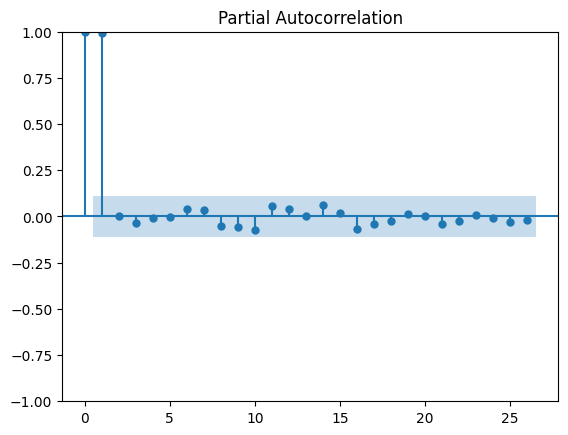

In [11]:
plot_acf(samsung_df['price'])
plot_pacf(samsung_df['price'])
plt.show()

In [12]:
#ARIMA 모델의 d값 구하기 위해 차분을 진행

diff_samsung_df = samsung_df.copy()
diff_samsung_df = diff_samsung_df['price'].diff()
diff_samsung_df = diff_samsung_df.dropna()
print(samsung_df['price'].head())
print(diff_samsung_df.head())

day
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-06    55500.0
2020-01-07    55800.0
2020-01-08    56800.0
Name: price, dtype: float64
day
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
2020-01-09    1800.0
Name: price, dtype: float64


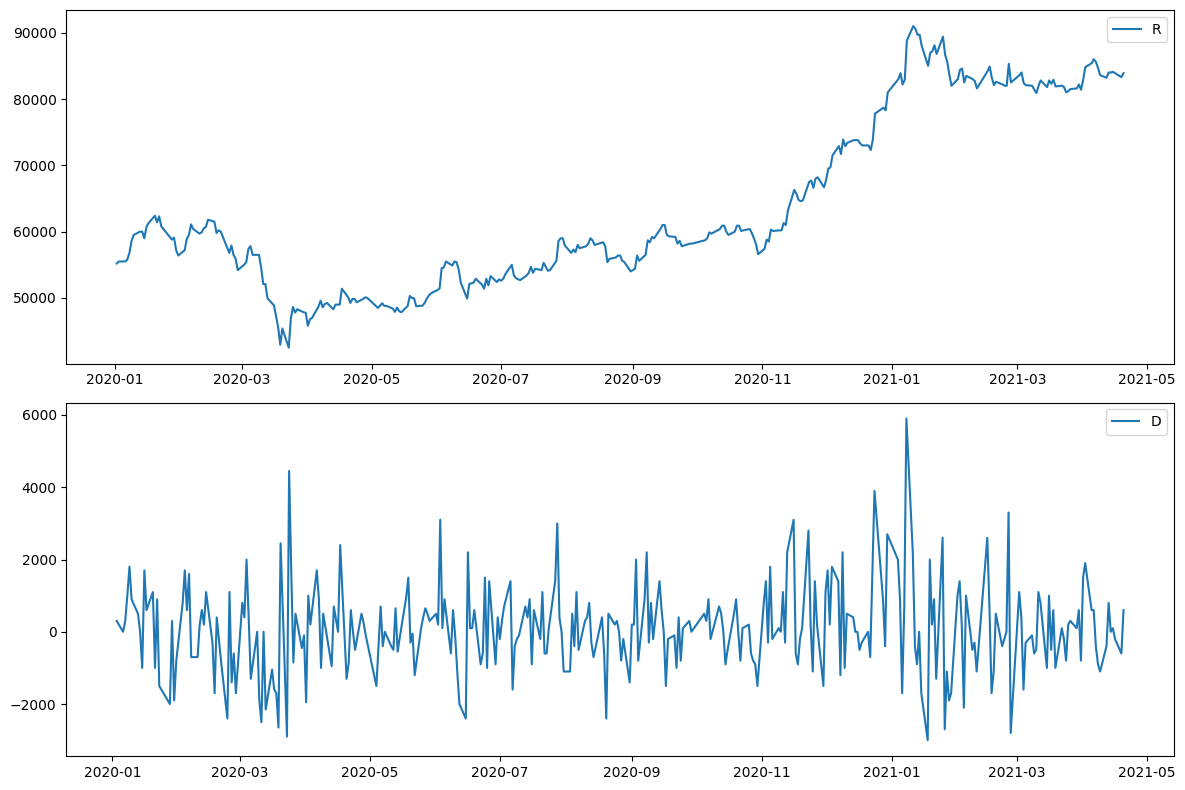

In [15]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(samsung_df['price'])
ax1.legend('Raw')

ax2.plot(diff_samsung_df )
ax2.legend('Differenced')


plt.tight_layout()
plt.show()

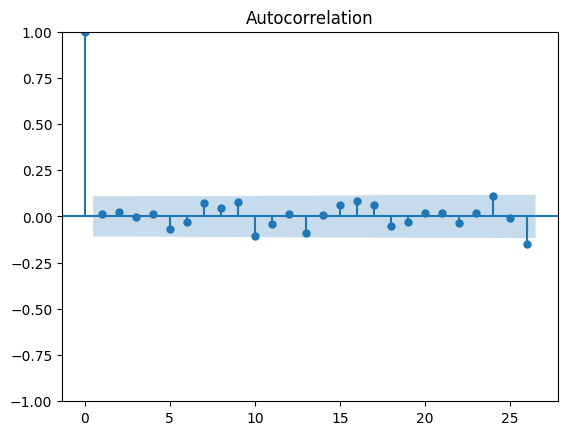

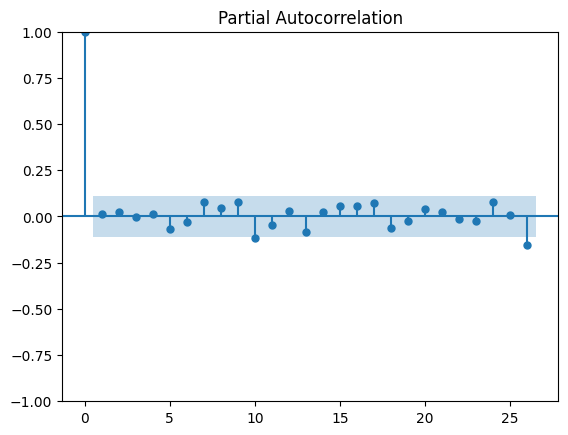

In [16]:
plot_acf(diff_samsung_df)
plot_pacf(diff_samsung_df)
plt.show()

In [ ]:
## 차분을1 회 진행하여 분포를 본 결과 시계열이 정상성을 만족함을 볼 수 있다.
## 이에 따라 ARIMA 모델의 p d q 값을 (0,1,0)으로 하여 채택한다.

In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(samsung_df, test_size=0.2, shuffle=False)

ARIMA_model = SARIMAX(train_data['price'], order=(0, 1, 0))
ARIMA_model_fit = ARIMA_model.fit()
print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  257
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2181.513
Date:                Wed, 28 Feb 2024   AIC                           4365.027
Time:                        07:44:31   BIC                           4368.572
Sample:                             0   HQIC                          4366.452
                                - 257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.471e+06   8.64e+04     17.024      0.000     1.3e+06    1.64e+06
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                73.91
Prob(Q):                              0.34   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


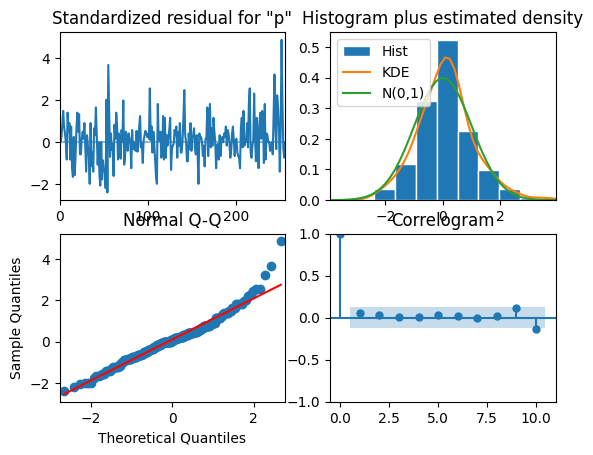

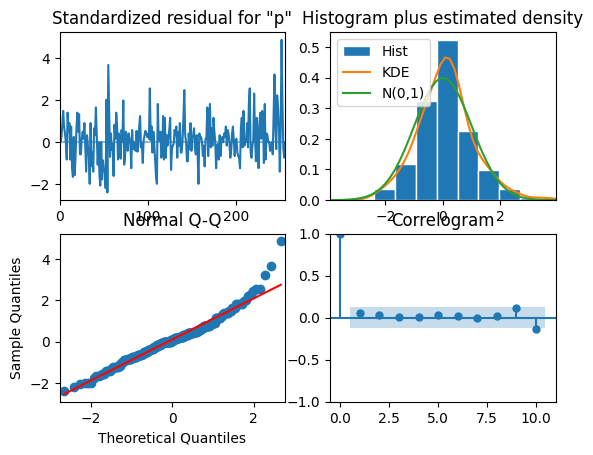

In [21]:
## 진단

ARIMA_model_fit.plot_diagnostics()

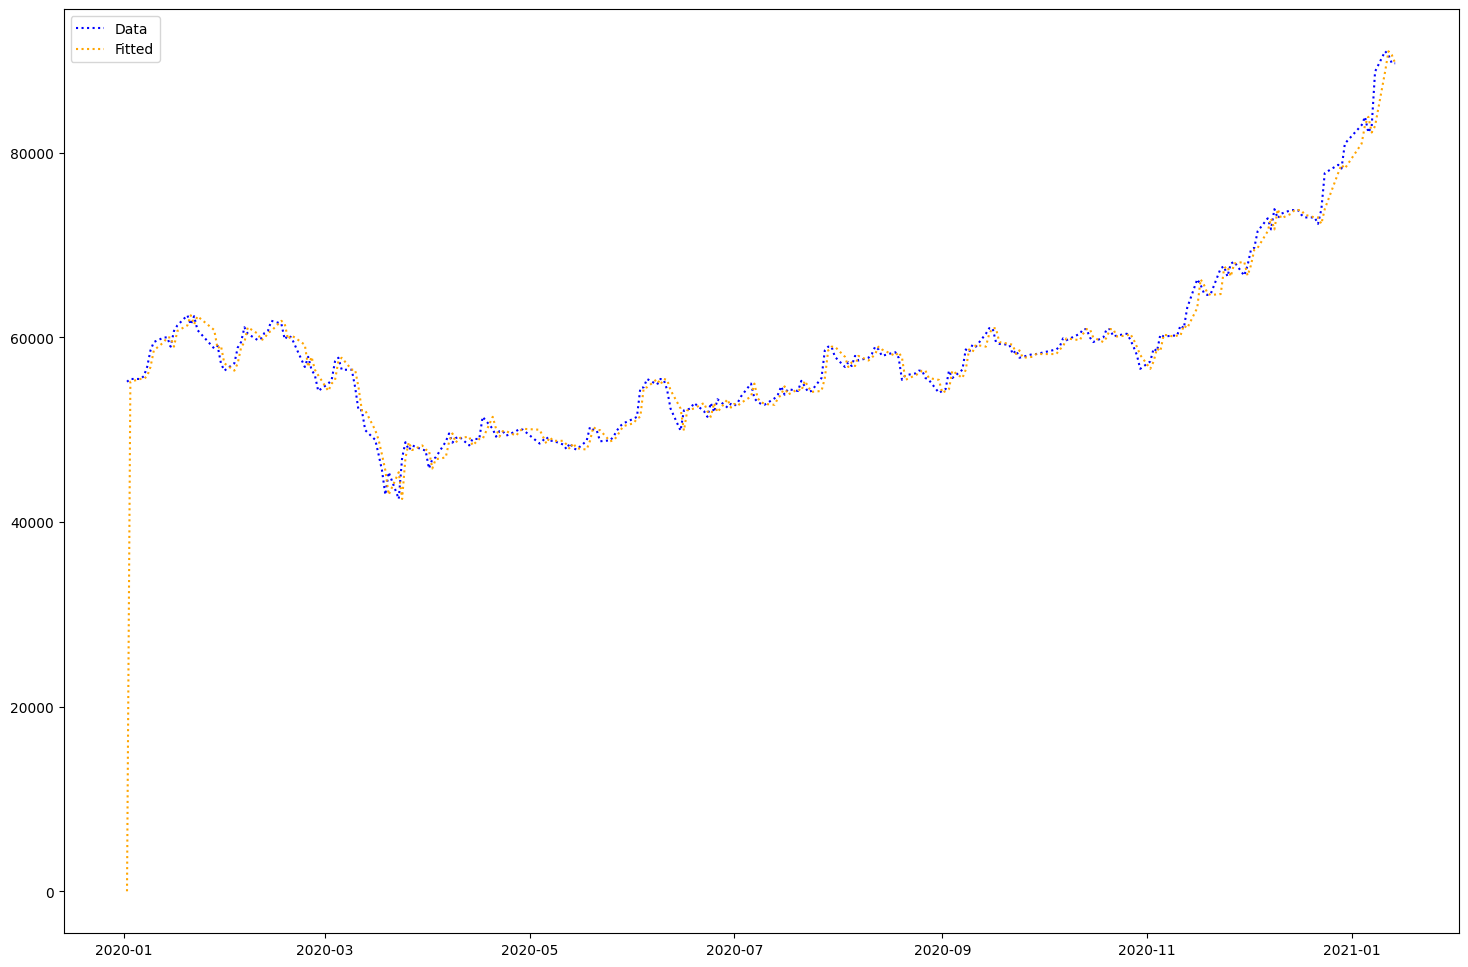

In [22]:
## 예측

plt.figure(figsize=(18, 12))
plt.plot(train_data.index, train_data['price'], label = 'Data', color = 'blue', linestyle = ':')
plt.plot(train_data.index, ARIMA_model_fit.predict(), label = 'Fitted', color = 'orange', linestyle = ':')
plt.legend()
plt.show()

In [23]:
forecast_arima = ARIMA_model_fit.forecast(steps=len(test_data))
forecast_arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


257    89700.0
258    89700.0
259    89700.0
260    89700.0
261    89700.0
        ...   
317    89700.0
318    89700.0
319    89700.0
320    89700.0
321    89700.0
Name: predicted_mean, Length: 65, dtype: float64

In [24]:
from statsmodels.tools.eval_measures import rmse

arima_rmse_error = rmse(test_df['price'], forecast_arima)
arima_mse_error = arima_rmse_error**2
mean_value = samsung_df['price'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 41388153.84615385
RMSE Error: 6433.362561379068
Mean: 63323.60248447205


In [ ]:
## 모두 같은 예측치를 낳는 결과가 나타났다. 이는 모델이 너무 간단하기 땜에 나타난 현상으로 볼 수 있다.
## 단변량 시계열이기 때문에 이와 같은 결과가 나타났으므로 더 복잡한 시계열이 필요하다.